<a href="https://colab.research.google.com/github/Kwonjihan/ML-teamproject/blob/develop/HyunjinNoh/lexicon(%EA%B0%90%EC%84%B1_%EC%96%B4%ED%9C%98)_%EA%B8%B0%EB%B0%98_%EA%B0%90%EC%A0%95_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lexicon(감성 어휘 사전) 기반 감성 분류: traning data의 레이블을 학습하는 것이 아닌 특정 감정을 나타내는 감성 어휘 사전을 학습. 레이블링이 안 되어있는 데이터에 대해 사전에 있는 어휘와 매칭시킨다. 비지도 학습에 많이 사용된다.

**>>"IMDB Dataset"은 레이블을 포함하고 있기 때문에
lexicon 기반 sentiment열만 분류시킨 결과와,
원래 레이블과 정확도를 비교 해볼 것.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ML/TP

In [3]:
import pandas as pd
df = pd.read_csv('./6000 IMDB Dataset.csv')
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive


**<데이터 전처리>**
1. HTML 태그와 같은 마크다운 문법과 연관된 태그는 모두 제거
2. 특수문자 제거
3. Non-Ascii 문자 액센트(불어 등)가 붙어있어 있는 단어를 어휘 사전에서 매칭이  가능한 형태로 변환 ###생략함
4. 축약된 단어 풀기; don't → do not, I'd → I would 혹은 I could
5. 어간 추출(stemming: arguing->argu) 혹은 표제어 추출(lemmatization: flies->fly)
6. 불용어 제거(stopwords): 조사, 관사 등 자주 출현하나 전체적인 의미에 큰 영향을 주지 않는 단어 제거

In [4]:
pip install html5lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 1.1 MB/s eta 0:00:00


In [5]:
pip install BeautifulSoup4

In [22]:
from bs4 import BeautifulSoup
import re #정규표현식
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')

review=df['review']

#축약단어 푸는 함수
def decontraction(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

##LancasterStemmer를 사용 or PorterStemmer를 사용했을 때
##스테머랑 레머타이저 중 둘 중 하나만 사용 or 둘 다 사용 (스테머 사용하면 terribly->terribl 이런 식으로 되어 주석처리함)
#어근 추출하는 함수(스테머)
#stemmer=nltk.stem.PorterStemmer()
#표제어 추출하는 함수(레머타이저)
lemmatizer = WordNetLemmatizer()

def clean(review):
  review_text=BeautifulSoup(review, 'html5lib').get_text() # HTML 태그 제거
  review_text=re.sub('[^a-zA-Z]', ' ', review_text) # 영어 문자 제외 나머지 기호(쉼표, 느낌표, 숫자 등) 제거하고 공백으로 대체
  decontraction(review_text) # 축약단어 풀기
  review_text=review_text.lower() # 소문자 변환

  review_words=review_text.split() # 단어로 분해 시킨 뒤에
  #review_words=[stemmer.stem(word) for word in review_words] # 어근 추출
  review_words=[lemmatizer.lemmatize(word) for word in review_words] # 표제어 추출

  stop_words = set(stopwords.words('english'))
  review_words=[w for w in review_words if w not in stop_words] # 불용어 제거

  review_text=' '.join(review_words)
  clean_review=review_text
  return clean_review

df['review']=review.apply(clean)
review

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       one reviewer ha mentioned watching oz episode ...
1       wonderful little production filming technique ...
2       thought wa wonderful way spend time hot summer...
3       petter mattei love time money visually stunnin...
4       probably time favorite movie story selflessnes...
                              ...                        
5995    something somewhere must terribly gone wrong r...
5996    wa next last film appearance jill ireland died...
5997    give movie cause die hard fan video game serie...
5998    serious mean wow wow think saw flick old issue...
5999    respect imdb rating anymore think bunch mormon...
Name: review, Length: 6000, dtype: object

In [25]:
df

,review,sentiment
0,one reviewer ha mentioned watching oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wa wonderful way spend time hot summer...,positive
3,petter mattei love time money visually stunnin...,positive
4,probably time favorite movie story selflessnes...,positive
...,...,...
5995,something somewhere must terribly gone wrong r...,negative
5996,wa next last film appearance jill ireland died...,negative
5997,give movie cause die hard fan video game serie...,negative
5998,serious mean wow wow think saw flick old issue...,negative


<TextBlob 어휘사전>

In [13]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 4.0 MB/s eta 0:00:00


In [30]:
#감정 분석 5개 미리보기
from textblob import TextBlob
for index, row in df.loc[0:4, :].iterrows(): #5개 행에 대해서만 샘플로 보여주기
    review = row['review']
    print(f'review {index} : {review.strip()}')
    print('sentiment:', row['sentiment'])
    print('Predicted sentiment polarity:', TextBlob(review).sentiment.polarity) #sentiment의 polarity(극성)는 -1.0은 매우 부정적인 감정, 1.0은 매우 긍정적인 감정을 의미
    print('-'*60)

review 0 : one reviewer ha mentioned watching oz episode hooked right exactly happened first thing struck oz wa brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty wa surreal say wa ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison ex

In [32]:
df

,review,sentiment
0,one reviewer ha mentioned watching oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wa wonderful way spend time hot summer...,1
3,petter mattei love time money visually stunnin...,1
4,probably time favorite movie story selflessnes...,1
...,...,...
5995,something somewhere must terribly gone wrong r...,negative
5996,wa next last film appearance jill ireland died...,negative
5997,give movie cause die hard fan video game serie...,negative
5998,serious mean wow wow think saw flick old issue...,negative


In [36]:
#정확도 비교를 쉽게 하기 위해 positive를 1, negative를 0으로 매핑
sentiment_mapping = {'positive': 1, 'negative': 0}
df['sentiment'] = df['sentiment'].replace(sentiment_mapping)
df

,review,sentiment
0,one reviewer ha mentioned watching oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wa wonderful way spend time hot summer...,1
3,petter mattei love time money visually stunnin...,1
4,probably time favorite movie story selflessnes...,1
...,...,...
5995,something somewhere must terribly gone wrong r...,0
5996,wa next last film appearance jill ireland died...,0
5997,give movie cause die hard fan video game serie...,0
5998,serious mean wow wow think saw flick old issue...,0


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#실제 감정분류 리스트(원래 data에 있던 sentiment열 데이터)
actual_sentiments = []

#추측한 감정분류 리스트(원래 data의 review열과 감성어휘분석을 통해 추측한 sentiment들)
predicted_sentiments = []
for index, row in df.iterrows():
    review = row['review']
    polarity = TextBlob(review).sentiment.polarity
    predicted_sentiment = 1 if polarity > 0 else 0 #sentiment polarity 값이 0 초과면 긍정으로 분류시키도록 함(긍정, 부정 이진 분류만 하면 되므로)
    actual_sentiments.append(row['sentiment'])
    predicted_sentiments.append(predicted_sentiment)

#evaluation
accuracy = accuracy_score(actual_sentiments, predicted_sentiments)
precision = precision_score(actual_sentiments, predicted_sentiments)
recall = recall_score(actual_sentiments, predicted_sentiments)
f1 = f1_score(actual_sentiments, predicted_sentiments)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.6996666666666667
Precision: 0.6356431159420289
Recall: 0.9356666666666666
F1-score: 0.7570118662351673


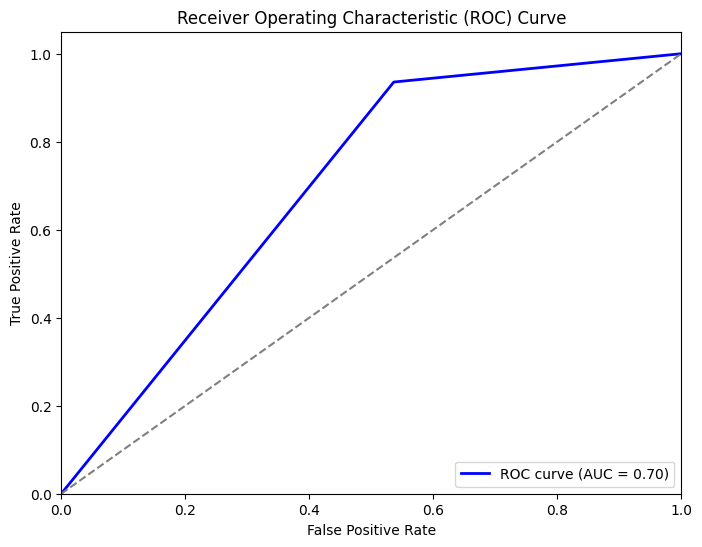

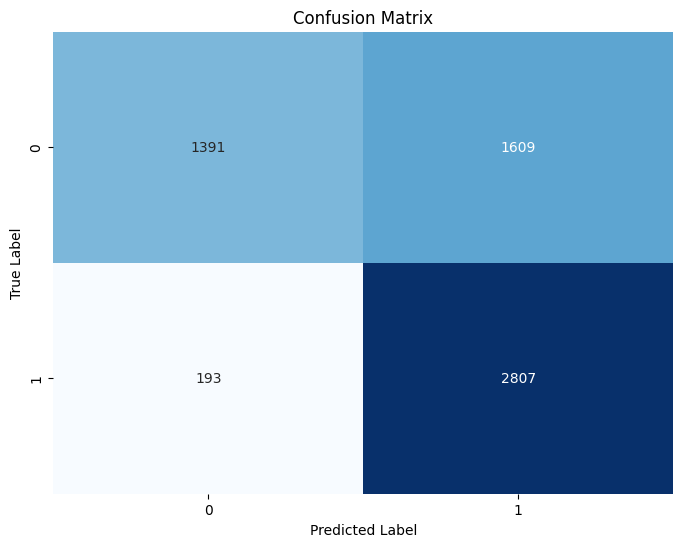

In [40]:
#시각화
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns

fpr, tpr, thresholds = roc_curve(actual_sentiments, predicted_sentiments)
auc = roc_auc_score(actual_sentiments, predicted_sentiments) # AUC score 계산

# ROC curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(actual_sentiments, predicted_sentiments) # confusion matrix 계산

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()